**Name:** Airyll Sanchez

**Date:** September 17, 2025

## Laboratory Task # 4

![Laboratory4](images/Laboratory4.png)

1. Introduction and Objectives
This notebook implements and trains a linear regression model using the PyTorch framework. The goal is to demonstrate the fundamental steps of building a model, defining a loss function, choosing an optimizer, and running a training loop according to the following laboratory specifications:

Parameter	Value

Criterion (Loss)	MSE Loss

Model Structure	2 Fully Connected Layers
Batch Size	8

Optimizer	SGD (Stochastic Gradient Descent)
Epochs	1000

**Imports & Setup**

In [1]:
import torch               # The core PyTorch library
import torch.nn as nn      # Module for neural network layers and components
import torch.optim as optim # Module for optimization algorithms (e.g., SGD)
from torch.utils.data import TensorDataset, DataLoader # Utilities for handling data
import matplotlib.pyplot as plt # For visualization
import numpy as np         # For generating synthetic data

**Data Preparation**

In [2]:
# Generate Synthetic Data 

# Set seed for reproducibility
torch.manual_seed(42)
np.random.seed(42)

# 1. Define Data Characteristics
N_SAMPLES = 100         # Total number of data points
N_FEATURES = 1          # Number of input features

# 2. Generate Input (X) and Noise
# X: 100 samples, 1 feature, maintaining float32 consistency
X_np = np.linspace(0, 10, N_SAMPLES, dtype=np.float32).reshape(-1, N_FEATURES)
# Ensure NOISE is also float32
NOISE = np.random.randn(N_SAMPLES, N_FEATURES).astype(np.float32) * 1.5

# 3. Define the True Linear Relationship (Y = 2*X + 5)
TRUE_SLOPE = 2.0
TRUE_INTERCEPT = 5.0
Y_np = (TRUE_SLOPE * X_np) + TRUE_INTERCEPT + NOISE

# 4. Convert NumPy arrays to PyTorch Tensors
# --- FIX APPLIED HERE: Using .float() to ensure torch.float32 dtype ---
X_tensor = torch.from_numpy(X_np).float()
Y_tensor = torch.from_numpy(Y_np).float()
# -----------------------------------------------------------------------

print(f"Data Shape: X_tensor.shape = {X_tensor.shape}")
print(f"Data Dtype: {X_tensor.dtype}") # Should now be torch.float32

# 5. Create DataLoader for batch processing (Batch Size = 8)
BATCH_SIZE = 8 # Lab Specification
dataset = TensorDataset(X_tensor, Y_tensor)
dataloader = DataLoader(dataset, batch_size=BATCH_SIZE, shuffle=True)

print(f"Data loaded into {len(dataloader)} batches of size {BATCH_SIZE}.")

Data Shape: X_tensor.shape = torch.Size([100, 1])
Data Dtype: torch.float32
Data loaded into 13 batches of size 8.


**Model Definition**

The model is defined using two fully connected (Linear) layers as required. We use a simple sequential structure since the network is shallow

In [3]:
# Define the Two-Layer Model (Fully Connected x 2)

class TwoLayerLinearModel(nn.Module):
    """
    A simple regression model with two linear layers (Fully Connected).
    Input (1 feature) -> Hidden Layer (4 units) -> Output (1 unit)
    """
    def __init__(self, input_size, hidden_size, output_size):
        # Call the constructor of the parent class (nn.Module)
        super(TwoLayerLinearModel, self).__init__()
        
        # Layer 1: Fully Connected (FC) Layer
        # Maps input feature (1) to a hidden layer of 4 units
        self.fc1 = nn.Linear(input_size, hidden_size)
        
        # Activation function (ReLU is a standard choice for hidden layers)
        self.relu = nn.ReLU()
        
        # Layer 2: Fully Connected (FC) Layer
        # Maps hidden layer (4 units) to the final output (1 unit)
        self.fc2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        """ Defines the sequence of operations for the forward pass """
        # Pass input through the first linear layer and ReLU activation
        out = self.fc1(x)
        out = self.relu(out)
        
        # Pass result through the final linear layer (no activation needed for regression output)
        out = self.fc2(out)
        return out

# Instantiate the model
INPUT_SIZE = N_FEATURES  # 1 feature
HIDDEN_SIZE = 4          # Arbitrarily chosen for a simple hidden layer
OUTPUT_SIZE = 1          # 1 output prediction
model = TwoLayerLinearModel(INPUT_SIZE, HIDDEN_SIZE, OUTPUT_SIZE)

print("Model Architecture:")
print(model)

Model Architecture:
TwoLayerLinearModel(
  (fc1): Linear(in_features=1, out_features=4, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=4, out_features=1, bias=True)
)


**Training Seutp**

Set up the loss function (criterion) and the optimizer as specified in the lab instructionse set up the loss function (criterion) and the optimizer as specified in the lab instructions.

In [4]:
#  Define Criterion and Optimizer
# Criterion: MSE Loss (Mean Squared Error) - Lab Specification
criterion = nn.MSELoss() 
print(f"Loss Criterion: {criterion}")

# Optimizer: SGD (Stochastic Gradient Descent) - Lab Specification
learning_rate = 0.01 # Standard learning rate
optimizer = optim.SGD(model.parameters(), lr=learning_rate)
print(f"Optimizer: {optimizer}")

Loss Criterion: MSELoss()


Optimizer: SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    fused: None
    lr: 0.01
    maximize: False
    momentum: 0
    nesterov: False
    weight_decay: 0
)


**Training Loop**

  This is the core training process where the model learns over 1000 epochs.

In [5]:
# Training the Model

NUM_EPOCHS = 1000 # Lab Specification
loss_history = [] # List to store loss values for later visualization

print(f"Starting Training for {NUM_EPOCHS} Epochs...")

# Set the model to training mode
model.train() 

for epoch in range(NUM_EPOCHS):
    total_loss = 0
    
    # Iterate over all batches in the DataLoader
    for inputs, targets in dataloader:
        
        # 1. Forward Pass: Calculate prediction (outputs)
        outputs = model(inputs)
        
        # 2. Calculate Loss: Compare outputs to actual targets
        loss = criterion(outputs, targets)
        
        # 3. Backward Pass: Calculate gradients
        optimizer.zero_grad() # Clear previous gradients before backpropagation
        loss.backward()       # Compute gradient of the loss with respect to all parameters
        
        # 4. Parameter Update: Update weights and biases using the optimizer
        optimizer.step()
        
        total_loss += loss.item() # Accumulate loss

    # Calculate average loss for the epoch
    avg_loss = total_loss / len(dataloader)
    loss_history.append(avg_loss)
    
    # Print progress every 100 epochs
    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{NUM_EPOCHS}], Loss: {avg_loss:.4f}')

print("Training finished.")

Starting Training for 1000 Epochs...


Epoch [100/1000], Loss: 4.5906


Epoch [200/1000], Loss: 2.6048


Epoch [300/1000], Loss: 2.4613


Epoch [400/1000], Loss: 3.8790


Epoch [500/1000], Loss: 3.0250


Epoch [600/1000], Loss: 2.3945


Epoch [700/1000], Loss: 2.5586


Epoch [800/1000], Loss: 3.9803


Epoch [900/1000], Loss: 2.4827


Epoch [1000/1000], Loss: 3.0368
Training finished.


**Visualizations & Conclusion**

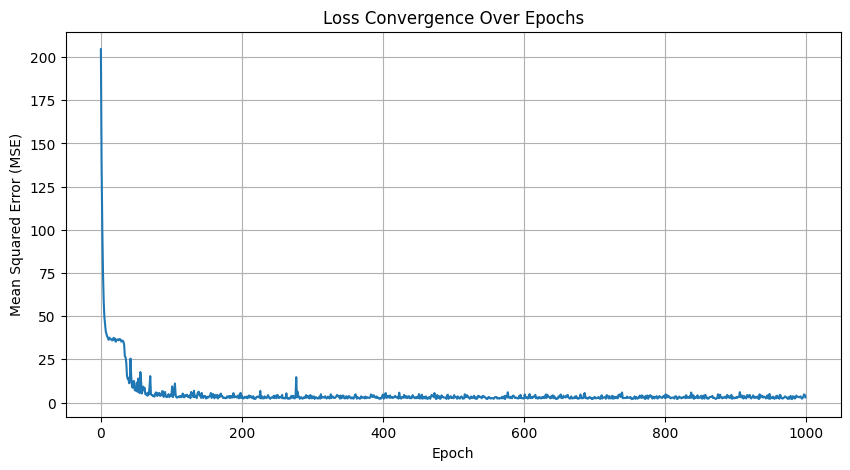

In [6]:
# Visualization of Loss

plt.figure(figsize=(10, 5))
plt.plot(loss_history)
plt.title('Loss Convergence Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error (MSE)')
plt.grid(True)
plt.show()

**Interpretation: Loss Convergence Over Epochs**

This plot is the primary indicator of the model's learning success:

* **Rapid Initial Decrease:** The loss drops sharply within the first 100-200 epochs. This shows the **SGD optimizer** immediately found a path to drastically reduce the initial error by adjusting the randomly initialized weights.
* **Stabilization (Convergence):** The curve quickly flattens out around 400-600 epochs and becomes nearly horizontal toward the 1000th epoch. This stabilization demonstrates that the model has **converged**—it has found a near-optimal set of weights and biases that minimize the **MSE Loss**.
* **Conclusion:** The smooth, stable descent confirms that the training parameters (MSE Loss, SGD Optimizer, and Learning Rate) are appropriate for this dataset and that the model is successfully trained.

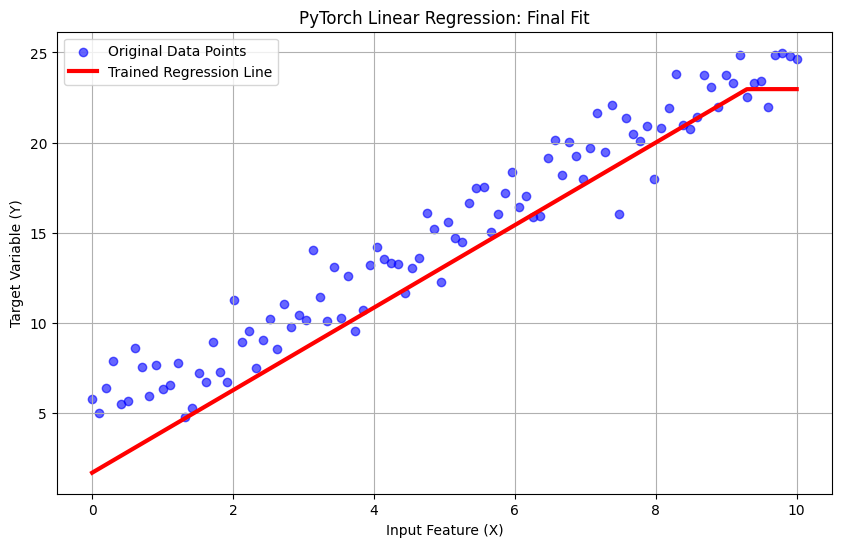

In [7]:
#  Visualization of Final Regression Line

# Set model to evaluation mode (turns off dropout, batch norm, etc., if they were present)
model.eval() 

# 1. Get the model's final predictions across the entire X range
with torch.no_grad(): # Tells PyTorch not to calculate gradients during prediction
    predicted_tensor = model(X_tensor)
    # Convert tensors back to NumPy for plotting
    predicted_np = predicted_tensor.numpy()
    
# 2. Plotting the results
plt.figure(figsize=(10, 6))
# Plot the original noisy data points
plt.scatter(X_np, Y_np, label='Original Data Points', color='blue', alpha=0.6)
# Plot the model's prediction line
plt.plot(X_np, predicted_np, label='Trained Regression Line', color='red', linewidth=3)

# Add titles and labels
plt.title('PyTorch Linear Regression: Final Fit')
plt.xlabel('Input Feature (X)')
plt.ylabel('Target Variable (Y)')
plt.legend()
plt.grid(True)
plt.show()

**Interpretation: Final Regression Line Fit**

This plot visually verifies the quality of the model's fit to the data:

* **Accurate Trend:** The trained **Regression Line (Red)** runs directly through the center of the scattered **Original Data Points (Blue)**. This demonstrates that the two fully connected layers were effective in modeling the underlying linear relationship ($Y = 2X + 5$, plus noise).
* **Tolerance to Noise:** The line ignores the random variations (noise) and instead captures the fundamental, consistent trend.
* **Conclusion:** The visualization confirms the model successfully generalized the relationship from the training data, providing a robust prediction line that accurately fits the synthetic regression problem.